# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
data.shape

(112915, 11)

------------
## Drop na

In [4]:
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [5]:
data.dropna(inplace=True)
data.shape

(108648, 11)

---------
## Create X and y

In [6]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [7]:
y.mean()

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [26]:
import numpy as np
import sklearn
print(sklearn.__version__)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0) #随机分割7比3
X_train.shape, X_test.shape, y_train.shape, y_test.shape

0.22.1


((76053, 10), (32595, 10), (76053,), (32595,))

数据标准化

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()   # 正规化
print(sc.fit(X_train))


StandardScaler(copy=True, with_mean=True, with_std=True)


In [27]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std.mean(),X_train_std.std(),X_test_std.mean(),X_test_std.std()


(-4.295787804590142e-17, 1.0, 0.0005511241683895228, 0.9522960818207552)

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [11]:
from sklearn.linear_model import LogisticRegression#导入逻辑分类包

lr = LogisticRegression(C=100.0**40, random_state=0, penalty='l2') #设置较小的正则化强度，随机种子，以及正则化惩罚项（L2）

lr.fit(X_train_std, y_train)
# 在训练集和测试集上进行预测
y_train_pred = lr.predict(np.array(X_train_std))
y_test_pred = lr.predict(np.array(X_test_std)) 


print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) #预测结果与测试集结果的误差

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率
# 斜率
print('Sloop: ' + str(lr.coef_[0])[1:len(str(lr.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % lr.intercept_)

Misclassified samples in test set: 2154
(accuracy_score) Training accuracy: 0.9331
(accuracy_score) Test accuracy: 0.9339
Sloop: -0.01428302 -0.36429906  1.72892458  0.31210449 -0.11519959 -0.09188134
  1.68983565 -0.1964285  -3.24882741  0.11639198
Intercept: -2.859


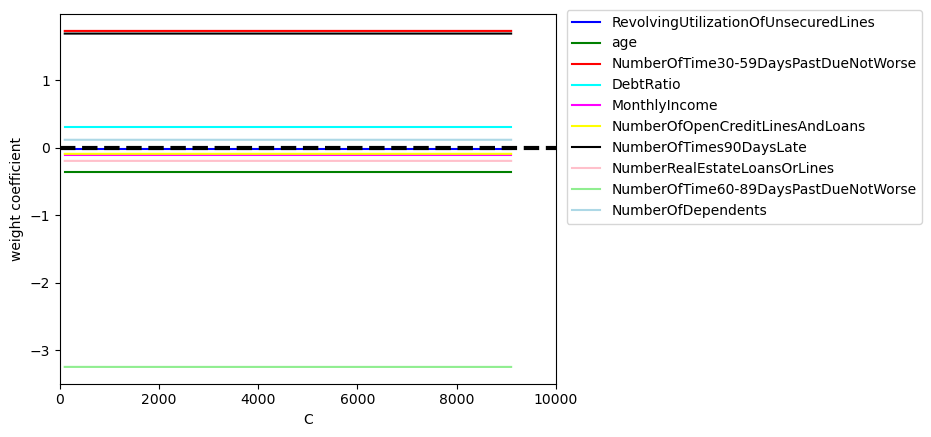

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(1, 100, 10):
    lr = LogisticRegression(penalty='l2', C=100.0*c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(100.0*c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=data.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([0, 100*100])
plt.ylabel('weight coefficient')
plt.xlabel('C')
#plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
# plt.savefig('./figures/l1_path.png', dpi=300)
plt.show()

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)
# 在训练集和测试集上进行预测
y_train_pred = tree.predict(np.array(X_train_std))  
y_test_pred = tree.predict(np.array(X_test_std))     


print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum())  #预测结果与测试集结果的误差

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率

Misclassified samples in test set: 2118
(accuracy_score) Training accuracy: 0.9342
(accuracy_score) Test accuracy: 0.9350


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
# 特征对模型分类重要程度，可以据此对决策树进行剪枝
model = ExtraTreesClassifier()
model.fit(X_train_std,y_train)
print('feature_importances:')
print(model.feature_importances_)

feature_importances:
[0.15521572 0.12926047 0.06704482 0.14981838 0.14900641 0.10836422
 0.09244638 0.04191192 0.05223547 0.05469621]


### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10,  # 树的数量
                                random_state=1,
                                n_jobs=2)  # 并行计算的数量，-1为全部
forest.fit(X_train_std, y_train)

# 在训练集和测试集上进行预测
y_train_pred = forest.predict(X_train_std)
y_test_pred = forest.predict(X_test_std)


print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum())#预测结果与测试集结果的误差

#正确率
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred))
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))


Misclassified samples in test set: 2193
(accuracy_score) Training accuracy: 0.9905
(accuracy_score) Test accuracy: 0.9327


### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [34]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
# 在训练集和测试集上进行预测
y_train_pred = svm.predict(X_train_std) 
y_test_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_test_pred).sum())#预测结果与测试集结果的误差

from sklearn.metrics import accuracy_score
#正确率
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred))
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

Misclassified samples: 2128
(accuracy_score) Training accuracy: 0.9343
(accuracy_score) Test accuracy: 0.9347


### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# 在训练集和测试集上进行预测
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_train_pred = knn.predict(np.array(X_train_std)) 
y_test_pred = knn.predict(np.array(X_test_std))        
# 测试集预测不对的样本数
print('Misclassified samples in test set: %d' % (y_test != y_test_pred).sum()) #预测结果与测试集结果的误差

from sklearn.metrics import accuracy_score
print('(accuracy_score) Training accuracy: %.4f' % accuracy_score(y_train, y_train_pred)) # 训练集的正确率
print('(accuracy_score) Test accuracy: %.4f' % accuracy_score(y_test, y_test_pred))  # 测试集的正确率

Misclassified samples in test set: 2205
(accuracy_score) Training accuracy: 0.9409
(accuracy_score) Test accuracy: 0.9324


---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>
- 练习2中已经给出accuracy

### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [17]:
## your code here

### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [18]:
## your code here

### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [19]:
## your code here

### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [20]:
## your code here

---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[30141   283]
 [ 1922   249]]


In [45]:
confusion = confusion_matrix(y_test, y_test_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("TP:", TP)#真阳性
print("TN:", TN)#真阴性
print("FP:", FP)#假阳性
print("FN:", FN)#假阴性

TP: 249
TN: 30141
FP: 283
FN: 1922


In [46]:
#Classification Accuracy
print((TP+TN) / float(TP+TN+FN+FP))
print(accuracy_score(y_test, y_test_pred))

0.93235158766682
0.93235158766682


In [48]:
#Classification Error
print((FP+FN) / float(TP+TN+FN+FP))
print(1-accuracy_score(y_test, y_test_pred))

0.06764841233317993
0.06764841233317997


In [49]:
#Sensitivity，Recall 正确识别的正例数据在实际正例数据中的百分比
from sklearn import metrics

print(TP / float(TP+FN))
recall = metrics.recall_score(y_test, y_test_pred)
print(metrics.recall_score(y_test, y_test_pred))

0.11469368954398894
0.11469368954398894


In [50]:
#Specificity 正确识别的负例数据在实际负例数据中的百分比
print(TN / float(TN+FP))

0.990698133052853


In [51]:
#False Positive Rate 实际值是负例数据，预测错误的百分比
print(FP / float(TN+FP))
specificity = TN / float(TN+FP)
print(1 - specificity)

0.00930186694714699
0.009301866947146964


In [52]:
#Precision 标记为正类的数据实际为正例的百分比
print(TP / float(TP+FP))
precision = metrics.precision_score(y_test, y_test_pred)
print(precision)

0.4680451127819549
0.4680451127819549


In [ ]:
#F度量 F度量（又称为F1分数或F分数），是使用精度和召回率的方法组合到一个度量上
print((2*precision*recall) / (precision+recall))
print(metrics.f1_score(y_test, y_test_pred))

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [58]:
from sklearn.preprocessing import binarize
y_pred_prob = lr.predict_proba(X_test_std)[:, 1]
y_pred_class = binarize(y_pred_prob.reshape(-1, 1), threshold=0.3)[:,0]

In [59]:
y_pred_class,y_test.values[60:70],y_pred_class[60:70]#看看效果

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [61]:
print(confusion)#之前的混淆矩阵
print(metrics.confusion_matrix(y_test, y_pred_class))#灵敏度阈值降低的混淆矩阵

[[30141   283]
 [ 1922   249]]
[[30201   223]
 [ 1942   229]]


In [63]:
#灵敏度变化
print(TP / float(TP+FN))#之前的灵敏度
print(metrics.recall_score(y_test, y_pred_class))#修改后的灵敏度

0.11469368954398894
0.10548134500230309
